# Generative Adversarial Networks for X-RAY Classification

The [MedMNIST v2 dataset](https://medmnist.com/) is the MNIST of Medical Imaging containing a large-scale MNIST-like collection of standardized biomedical images.

Can we use this dataset to generate additional synthetic images? Can we condition the data generation on a label?

Let's try this in this exercise!

## Exercise:


#### 1. Definition of Research Question
We propose to explore one of the MedMNIST datasets and and define a suitable research question. This research question should contain GANs in its hypothesis and aiming towards solving a useful clinical task. Note: Normally, one would also look up the literature to see if the research question is already answered. For now, we skip this step

#### 2. Definition of a Baseline for the Research Question
To test our hypothesis, we need to gather experimental data to compare our solution against the state-of-the-art. The state-of-the-art is our baseline method.

#### 3. Implementation of the Baseline
We implement the baseline and try to do so making our code reusable for our method  (e.g. dataloaders, downstream classifer).  

#### 4. Testing the Baseline and Storage of Results
Now, we test out our baseline implementation and gather the corresponding empirical results and observe its results on our target performance metrics. Can these results be improved upon? Or, can similar results be aachieved with our more e.g. privacy-preserving, interpretable, generalizable, simpler, or more environment friendly solution?

#### 5. Implementation of our GAN Method
The method we hypothesise for the clinical task at hand would need to be implemented to allow testing its usefulness.

#### 6. Test of our GAN Method and Storage of Results
Now is the time to observe whether our method/intervention yields useful results, as we can readily compare it to our  baseline.

#### 7. Comparison of our Method and Baseline, Interpretration of Results
Now that we have generated some experimental data, we can interpret our results and clearly demonstrate whether our method was useful for the clinical task. We can now reject or accept our hypothesis.

#### 8. Reflective Account
What could be the reasons why our study did or did not succeed? What do you think are the limitations of our study? What can we learn and takeaway from this exercise? How should it inform our future work? What are the next things to try?

# 1. Definition of a Research question


### Review of MedMNIST Datasets

The MedMNIST dataset including 12 datasets for 2D and 6 datasets for 3D, in total containing 708,069 2D images and 10,214 3D images. The dataset is pre-processed into 28 x 28 (2D) or 28 x 28 x 28 (3D) images alongside the corresponding classification labels for diverse classification tasks (binary/multi-class, ordinal regression and multi-label). More information can be found in the [MedMNIST homepage](https://medmnist.com/).


### Choice of PneumoniaMNIST Dataset for our Study

We propose to use the PneumoniaMNIST dataset from MedMNIST, which contains to 5,856 chest x-rays (train: 4,708, validation: 524, test: 624). The reason for choosing this dataset is that its respective image classification task is binary (pneumonia/normal). Binary classification is likely to be simpler than multi-class classification for data augmentation purposes i.e. only two rather than multiple class-conditioned images need to be generated.
More information on the source of the Pneumonia dataset can be found [here](https://www.sciencedirect.com/science/article/pii/S0092867418301545).


### Definition of our Research Question

We follow the clinical task defined by the dataset providers, which is the classification of resampled chest xrays to diagnose lung pneumonia.

In this regard, our objective would be to maximize the performance of the classifier on the test dataset that should, in theory, resemble the real world distribution if we'd deploy our classifer into a clinical setting.

Now, we could train a GAN to augment the classfier's training data, which might improve classification performance.

However, the [reported performance](https://medmnist.com/) is already quite strong:

**ResNet-18: AUC: 0.944, ACC: 0.854**

There seems to be not that much to gain with GAN-based data augmentation (*Note: You may still try if you like*).

On the other hand, privacy preservation is a topic of immense importance in medical imaging. The pneumonia chest scans are from a pediatric patient cohort that paticularly requires special data protection. We could train a GAN to generate a synthetic dataset that would likely need less privacy protection than the real data.

*Note: Feel free to checkout the related topic of [differential privacy](https://ai.googleblog.com/2022/02/applying-differential-privacy-to-large.html) that provides a guarantee of privacy, among others, in neural networks.*

In this sense, we can now define our hypothesis:

**H1: Could we, instead of using real patient data, use only synthetic data to train our classifier and achieve comparable performance?**

# 2. Definition of a Baseline for the Research Question


##### We can now define our baseline metrics:
For example, a ResNet-18 trained on the real training dataset achieved AUC: 0.944 and ACC: 0.854

##### We define our method:
A simple CNN trained on a GAN-generated synthetic training dataset.

You are free to change the CNN model and use another architecture (e.g.,[see baseline](https://medmnist.com/))

##### How do we create the GAN-generated dataset?
Feel free to explore any idea you have. You may try out different (un)conditional GAN architectures and loss functions. Further below you will find some optional guidance.

# 3. Implementation of the Baseline

### Getting the Data
As always, you need access to the dataset. In this case you can download the pneumoniamnist.npz from [Zenodo](https://zenodo.org/record/5208230#.YmcLxtNBz0o). However, note that you can also access medMNIST data via the python packaging index ([pip](https://pypi.org/project/medmnist/)) or [Github](https://github.com/MedMNIST/MedMNIST) directly as pytorch dataset class.

For example:

In [6]:
!pip3 install medmnist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached 

In [7]:
import medmnist
from medmnist import INFO, Evaluator
info = INFO['pneumoniamnist']
DataClass = getattr(medmnist, info['python_class'])

task = info['task']
n_channels = info['n_channels']
n_classes = len(info['label'])

Let's further explore the dataset. We can start by printing dataset info and checking the label distribution.

In [8]:
# Download the dataset
train_dataset = DataClass(split='train', download=True)

# Print dataset information
print(train_dataset)

100%|██████████| 4170669/4170669 [00:04<00:00, 902058.95it/s]

Dataset PneumoniaMNIST of size 28 (pneumoniamnist)
    Number of datapoints: 4708
    Root location: /root/.medmnist
    Split: train
    Task: binary-class
    Number of channels: 1
    Meaning of labels: {'0': 'normal', '1': 'pneumonia'}
    Number of samples: {'train': 4708, 'val': 524, 'test': 624}
    Description: The PneumoniaMNIST is based on a prior dataset of 5,856 pediatric chest X-Ray images. The task is binary-class classification of pneumonia against normal. We split the source training set with a ratio of 9:1 into training and validation set and use its source validation set as the test set. The source images are gray-scale, and their sizes are (384−2,916)×(127−2,713). We center-crop the images and resize them into 1×28×28.
    License: CC BY 4.0


In [9]:
from collections import Counter

# Check the training label distribution
train_classes = [float(label) for _, label in train_dataset]
print (dict(Counter(train_classes)))

<ipython-input-9-515e94852988>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  train_classes = [float(label) for _, label in train_dataset]


{1.0: 3494, 0.0: 1214}


/usr/local/lib/python3.10/dist-packages/medmnist/utils.py:32: FutureWarning: `multichannel` is a deprecated argument name for `montage`. It will be removed in version 1.0. Please use `channel_axis` instead.
  montage_arr = skimage_montage(sel_img, multichannel=(n_channels == 3))


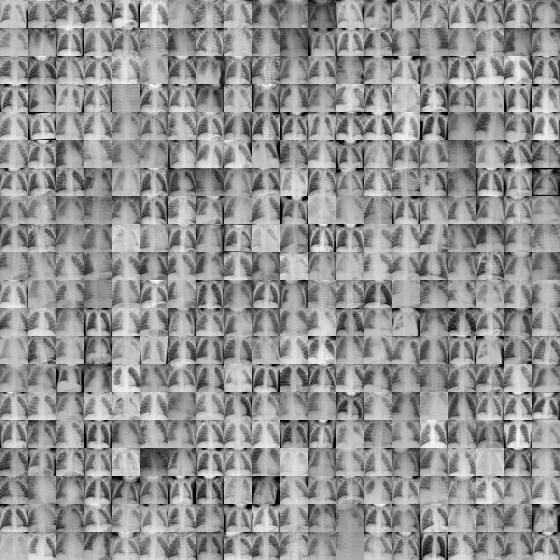

In [10]:
# Let's have a look at some of the training images.
train_dataset.montage(length=20)

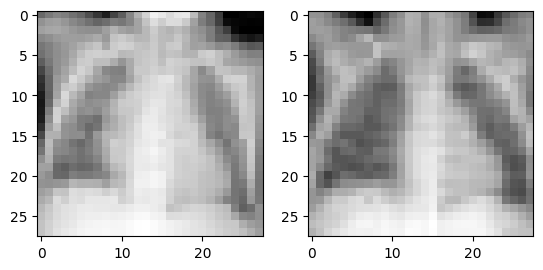

In [11]:
# Let's visually compare pneumial vs. healthy thoraic xray
# 0: normal, 1: pneumonia
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2)
ax[0].imshow(train_dataset[0][0], cmap='gray') # pneumonia
ax[1].imshow(train_dataset[200][0],cmap='gray') # normal

### Baseline Model Implementation
To implement the baseline, we start with the [medMNIST github](https://github.com/MedMNIST/MedMNIST), where we can find a [Pytorch getting started notebook](https://github.com/MedMNIST/MedMNIST/blob/main/examples/getting_started.ipynb).

In [12]:
# We define a simple CNN model for pneumonia classification
from torch import nn

class Net(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(Net, self).__init__()

        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels, 16, kernel_size=3),
            nn.BatchNorm2d(16),
            nn.ReLU())

        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 16, kernel_size=3),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))

        self.layer3 = nn.Sequential(
            nn.Conv2d(16, 64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU())

        self.layer4 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU())

        self.layer5 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))

        self.fc = nn.Sequential(
            nn.Linear(64 * 4 * 4, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, num_classes-1)) # -1 if we use binary CLF

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

Initialization of model, criterion and optimizer

In [13]:
from torch import optim

lr = 0.001

model_base = Net(in_channels=n_channels, num_classes=n_classes)

# define loss function and optimizer
criterion = nn.BCEWithLogitsLoss()

optimizer = optim.SGD(model_base.parameters(), lr=lr, momentum=0.9)


# 4. Testing the Baseline and Storage of Results


Defining hyperparameters and splitting of the dataset into test, validation, train.

In [14]:
data_flag = 'pneumoniamnist'
download = True  #  set to False if already loaded

NUM_EPOCHS = 5
BATCH_SIZE = 128
#lr = 0.001

info = INFO[data_flag]
#task = info['task']
#n_channels = info['n_channels']
#n_classes = len(info['label'])

DataClass = getattr(medmnist, info['python_class'])

In [15]:
from torchvision import transforms, utils
from torch.utils.data import DataLoader, Dataset

# preprocessing
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5])
])

# load the data
train_dataset = DataClass(split='train', transform=data_transform, download=download)
val_dataset = DataClass(split='val', transform=data_transform, download=download)
test_dataset = DataClass(split='test', transform=data_transform, download=download)

# ingest torch datasets data into torch dataloader
train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
train_loader_at_eval = DataLoader(dataset=train_dataset, batch_size=2*BATCH_SIZE, shuffle=False)
val_loader = DataLoader(dataset=val_dataset, batch_size=2*BATCH_SIZE, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=2*BATCH_SIZE, shuffle=False)

Using downloaded and verified file: /root/.medmnist/pneumoniamnist.npz
Using downloaded and verified file: /root/.medmnist/pneumoniamnist.npz
Using downloaded and verified file: /root/.medmnist/pneumoniamnist.npz


Defining evaluation metrics such as the area under the receiver operating characteristic curve (AUROC) and the accuracy (ACC).

In [3]:
def getAUC(y_true, y_score, task):
    '''AUC metric.
    :param y_true: the ground truth labels, shape: (n_samples, n_labels) or (n_samples,) if n_labels==1
    :param y_score: the predicted score of each class,
    shape: (n_samples, n_labels) or (n_samples, n_classes) or (n_samples,) if n_labels==1 or n_classes==1
    :param task: the task of current dataset
    '''
    y_true = y_true.squeeze()
    y_score = y_score.squeeze()

    if task == 'multi-label, binary-class':
        auc = 0
        for i in range(y_score.shape[1]):
            label_auc = roc_auc_score(y_true[:, i], y_score[:, i])
            auc += label_auc
        ret = auc / y_score.shape[1]
    elif task == 'binary-class':
        if y_score.ndim == 2:
            y_score = y_score[:, -1]
        else:
            assert y_score.ndim == 1
        ret = roc_auc_score(y_true, y_score)
    else:
        auc = 0
        for i in range(y_score.shape[1]):
            y_true_binary = (y_true == i).astype(float)
            y_score_binary = y_score[:, i]
            auc += roc_auc_score(y_true_binary, y_score_binary)
        ret = auc / y_score.shape[1]

    return ret

def getACC(y_true, y_score, task, threshold=0.5):
    '''Accuracy metric.
    :param y_true: the ground truth labels, shape: (n_samples, n_labels) or (n_samples,) if n_labels==1
    :param y_score: the predicted score of each class,
    shape: (n_samples, n_labels) or (n_samples, n_classes) or (n_samples,) if n_labels==1 or n_classes==1
    :param task: the task of current dataset
    :param threshold: the threshold for multilabel and binary-class tasks
    '''
    y_true = y_true.squeeze()
    y_score = y_score.squeeze()

    if task == 'multi-label, binary-class':
        y_pre = y_score > threshold
        acc = 0
        for label in range(y_true.shape[1]):
            label_acc = accuracy_score(y_true[:, label], y_pre[:, label])
            acc += label_acc
        ret = acc / y_true.shape[1]
    elif task == 'binary-class':
        if y_score.ndim == 2:
            y_score = y_score[:, -1]
        else:
            assert y_score.ndim == 1
        ret = accuracy_score(y_true, y_score > threshold)
    else:
        ret = accuracy_score(y_true, np.argmax(y_score, axis=-1))

    return ret

Training the baseline pneumonia classification model.

In [16]:
from tqdm import tqdm

for epoch in range(NUM_EPOCHS):
    train_correct = 0
    train_total = 0
    test_correct = 0
    test_total = 0

    model_base.train()
    for inputs, targets in tqdm(train_loader):
        # forward + backward + optimize
        optimizer.zero_grad()
        outputs = model_base(inputs)

        targets = targets.float()
        outputs = outputs.float()

        print(targets.shape)
        print(outputs.shape)
        loss = criterion(outputs, targets)

        loss.backward()
        optimizer.step()

  0%|          | 0/37 [00:00<?, ?it/s]

torch.Size([128, 1])
torch.Size([128, 1])


  5%|▌         | 2/37 [00:00<00:15,  2.33it/s]

torch.Size([128, 1])
torch.Size([128, 1])


  8%|▊         | 3/37 [00:01<00:12,  2.76it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 11%|█         | 4/37 [00:01<00:11,  2.92it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 14%|█▎        | 5/37 [00:01<00:10,  2.99it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 16%|█▌        | 6/37 [00:02<00:10,  3.08it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 19%|█▉        | 7/37 [00:02<00:09,  3.14it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 22%|██▏       | 8/37 [00:02<00:09,  3.16it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 24%|██▍       | 9/37 [00:03<00:08,  3.18it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 27%|██▋       | 10/37 [00:03<00:07,  3.41it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 32%|███▏      | 12/37 [00:03<00:06,  4.06it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 38%|███▊      | 14/37 [00:04<00:04,  4.60it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 43%|████▎     | 16/37 [00:04<00:04,  4.88it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 49%|████▊     | 18/37 [00:04<00:03,  4.94it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 51%|█████▏    | 19/37 [00:05<00:03,  4.95it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 57%|█████▋    | 21/37 [00:05<00:03,  5.04it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 62%|██████▏   | 23/37 [00:05<00:02,  4.98it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 65%|██████▍   | 24/37 [00:06<00:02,  4.87it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 70%|███████   | 26/37 [00:06<00:02,  4.96it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 76%|███████▌  | 28/37 [00:06<00:01,  5.03it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 81%|████████  | 30/37 [00:07<00:01,  5.04it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 86%|████████▋ | 32/37 [00:07<00:01,  4.94it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 92%|█████████▏| 34/37 [00:08<00:00,  5.02it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 97%|█████████▋| 36/37 [00:08<00:00,  5.00it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([100, 1])
torch.Size([100, 1])


  3%|▎         | 1/37 [00:00<00:07,  4.85it/s]

torch.Size([128, 1])
torch.Size([128, 1])


  5%|▌         | 2/37 [00:00<00:07,  4.39it/s]

torch.Size([128, 1])
torch.Size([128, 1])


  8%|▊         | 3/37 [00:00<00:07,  4.48it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 11%|█         | 4/37 [00:00<00:07,  4.38it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 14%|█▎        | 5/37 [00:01<00:07,  4.51it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 19%|█▉        | 7/37 [00:01<00:06,  4.49it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 22%|██▏       | 8/37 [00:01<00:06,  4.64it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 24%|██▍       | 9/37 [00:01<00:06,  4.63it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 27%|██▋       | 10/37 [00:02<00:05,  4.61it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 32%|███▏      | 12/37 [00:02<00:05,  4.70it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 38%|███▊      | 14/37 [00:03<00:04,  4.68it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 41%|████      | 15/37 [00:03<00:04,  4.82it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 46%|████▌     | 17/37 [00:03<00:04,  4.80it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 49%|████▊     | 18/37 [00:03<00:03,  4.77it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 51%|█████▏    | 19/37 [00:04<00:03,  4.75it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 54%|█████▍    | 20/37 [00:04<00:03,  4.77it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 59%|█████▉    | 22/37 [00:04<00:03,  4.08it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 62%|██████▏   | 23/37 [00:05<00:03,  3.75it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 65%|██████▍   | 24/37 [00:05<00:03,  3.54it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 68%|██████▊   | 25/37 [00:05<00:03,  3.38it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 70%|███████   | 26/37 [00:06<00:03,  3.31it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 73%|███████▎  | 27/37 [00:06<00:03,  3.29it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 76%|███████▌  | 28/37 [00:06<00:02,  3.15it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 78%|███████▊  | 29/37 [00:07<00:02,  3.13it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 81%|████████  | 30/37 [00:07<00:02,  3.45it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 84%|████████▍ | 31/37 [00:07<00:01,  3.77it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 86%|████████▋ | 32/37 [00:07<00:01,  4.01it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 89%|████████▉ | 33/37 [00:07<00:00,  4.23it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 92%|█████████▏| 34/37 [00:08<00:00,  4.32it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 95%|█████████▍| 35/37 [00:08<00:00,  4.43it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 97%|█████████▋| 36/37 [00:08<00:00,  4.59it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([100, 1])
torch.Size([100, 1])


  3%|▎         | 1/37 [00:00<00:07,  4.57it/s]

torch.Size([128, 1])
torch.Size([128, 1])


  5%|▌         | 2/37 [00:00<00:07,  4.64it/s]

torch.Size([128, 1])
torch.Size([128, 1])


  8%|▊         | 3/37 [00:00<00:07,  4.68it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 11%|█         | 4/37 [00:00<00:06,  4.75it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 14%|█▎        | 5/37 [00:01<00:06,  4.60it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 16%|█▌        | 6/37 [00:01<00:06,  4.64it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 19%|█▉        | 7/37 [00:01<00:06,  4.64it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 22%|██▏       | 8/37 [00:01<00:06,  4.69it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 24%|██▍       | 9/37 [00:01<00:05,  4.69it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 27%|██▋       | 10/37 [00:02<00:05,  4.75it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 30%|██▉       | 11/37 [00:02<00:05,  4.68it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 32%|███▏      | 12/37 [00:02<00:05,  4.67it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 35%|███▌      | 13/37 [00:02<00:05,  4.67it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 38%|███▊      | 14/37 [00:03<00:04,  4.63it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 41%|████      | 15/37 [00:03<00:04,  4.59it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 43%|████▎     | 16/37 [00:03<00:04,  4.65it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 46%|████▌     | 17/37 [00:03<00:04,  4.61it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 49%|████▊     | 18/37 [00:03<00:04,  4.64it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 51%|█████▏    | 19/37 [00:04<00:03,  4.62it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 54%|█████▍    | 20/37 [00:04<00:03,  4.64it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 57%|█████▋    | 21/37 [00:04<00:03,  4.75it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 59%|█████▉    | 22/37 [00:04<00:03,  4.77it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 62%|██████▏   | 23/37 [00:04<00:02,  4.80it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 65%|██████▍   | 24/37 [00:05<00:02,  4.66it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 68%|██████▊   | 25/37 [00:05<00:02,  4.67it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 70%|███████   | 26/37 [00:05<00:02,  4.75it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 73%|███████▎  | 27/37 [00:05<00:02,  4.72it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 78%|███████▊  | 29/37 [00:06<00:01,  4.62it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 81%|████████  | 30/37 [00:06<00:01,  4.24it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 86%|████████▋ | 32/37 [00:07<00:01,  2.98it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 89%|████████▉ | 33/37 [00:07<00:01,  3.34it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 92%|█████████▏| 34/37 [00:07<00:00,  3.65it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 95%|█████████▍| 35/37 [00:08<00:00,  3.87it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 97%|█████████▋| 36/37 [00:08<00:00,  4.08it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([100, 1])
torch.Size([100, 1])


  3%|▎         | 1/37 [00:00<00:11,  3.16it/s]

torch.Size([128, 1])
torch.Size([128, 1])


  5%|▌         | 2/37 [00:00<00:11,  3.04it/s]

torch.Size([128, 1])
torch.Size([128, 1])


  8%|▊         | 3/37 [00:01<00:11,  2.87it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 11%|█         | 4/37 [00:01<00:12,  2.55it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 16%|█▌        | 6/37 [00:02<00:12,  2.54it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 19%|█▉        | 7/37 [00:02<00:11,  2.64it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 22%|██▏       | 8/37 [00:02<00:10,  2.78it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 24%|██▍       | 9/37 [00:03<00:08,  3.15it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 27%|██▋       | 10/37 [00:03<00:07,  3.49it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 30%|██▉       | 11/37 [00:03<00:07,  3.40it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 32%|███▏      | 12/37 [00:03<00:07,  3.45it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 35%|███▌      | 13/37 [00:04<00:06,  3.72it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 38%|███▊      | 14/37 [00:04<00:05,  3.92it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 41%|████      | 15/37 [00:04<00:05,  4.07it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 43%|████▎     | 16/37 [00:04<00:05,  4.09it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 46%|████▌     | 17/37 [00:05<00:04,  4.07it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 49%|████▊     | 18/37 [00:05<00:04,  4.15it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 51%|█████▏    | 19/37 [00:05<00:04,  4.26it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 54%|█████▍    | 20/37 [00:05<00:03,  4.33it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 57%|█████▋    | 21/37 [00:06<00:03,  4.40it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 59%|█████▉    | 22/37 [00:06<00:03,  4.44it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 62%|██████▏   | 23/37 [00:06<00:03,  4.55it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 65%|██████▍   | 24/37 [00:06<00:02,  4.56it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 68%|██████▊   | 25/37 [00:06<00:02,  4.59it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 70%|███████   | 26/37 [00:07<00:02,  4.49it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 76%|███████▌  | 28/37 [00:07<00:02,  3.31it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 78%|███████▊  | 29/37 [00:08<00:02,  3.06it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 81%|████████  | 30/37 [00:08<00:02,  2.99it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 86%|████████▋ | 32/37 [00:09<00:01,  2.64it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 89%|████████▉ | 33/37 [00:09<00:01,  2.63it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 92%|█████████▏| 34/37 [00:10<00:01,  2.52it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 95%|█████████▍| 35/37 [00:10<00:00,  2.49it/s]

torch.Size([128, 1])
torch.Size([128, 1])


100%|██████████| 37/37 [00:11<00:00,  3.20it/s]


torch.Size([100, 1])
torch.Size([100, 1])


  0%|          | 0/37 [00:00<?, ?it/s]

torch.Size([128, 1])
torch.Size([128, 1])


  5%|▌         | 2/37 [00:00<00:16,  2.12it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


  8%|▊         | 3/37 [00:01<00:16,  2.11it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 11%|█         | 4/37 [00:02<00:19,  1.66it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 14%|█▎        | 5/37 [00:03<00:26,  1.19it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 19%|█▉        | 7/37 [00:05<00:23,  1.26it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 22%|██▏       | 8/37 [00:05<00:20,  1.43it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 24%|██▍       | 9/37 [00:05<00:17,  1.64it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 27%|██▋       | 10/37 [00:06<00:15,  1.70it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 30%|██▉       | 11/37 [00:07<00:14,  1.79it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 35%|███▌      | 13/37 [00:07<00:11,  2.17it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 41%|████      | 15/37 [00:08<00:09,  2.37it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 43%|████▎     | 16/37 [00:08<00:08,  2.36it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 46%|████▌     | 17/37 [00:09<00:09,  2.18it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 49%|████▊     | 18/37 [00:10<00:09,  2.11it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 51%|█████▏    | 19/37 [00:10<00:08,  2.02it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 54%|█████▍    | 20/37 [00:10<00:08,  2.12it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 57%|█████▋    | 21/37 [00:11<00:08,  1.93it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 59%|█████▉    | 22/37 [00:12<00:07,  2.04it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 62%|██████▏   | 23/37 [00:12<00:06,  2.03it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 65%|██████▍   | 24/37 [00:13<00:06,  2.04it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 70%|███████   | 26/37 [00:13<00:04,  2.24it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 73%|███████▎  | 27/37 [00:14<00:04,  2.24it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 76%|███████▌  | 28/37 [00:14<00:03,  2.36it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 78%|███████▊  | 29/37 [00:15<00:03,  2.47it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 81%|████████  | 30/37 [00:15<00:03,  2.25it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 84%|████████▍ | 31/37 [00:16<00:02,  2.16it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 86%|████████▋ | 32/37 [00:16<00:02,  1.79it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 92%|█████████▏| 34/37 [00:18<00:01,  1.68it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 95%|█████████▍| 35/37 [00:18<00:01,  1.77it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


100%|██████████| 37/37 [00:19<00:00,  1.92it/s]

torch.Size([100, 1])
torch.Size([100, 1])


Validation and test of the baseline model. This will let us know how good our model when trained on real data.

In [17]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import torch

# evaluation
def test(split, model):
    model.eval()
    y_true = torch.tensor([])
    y_score = torch.tensor([])

    if split == 'train':
        data_loader = train_loader_at_eval
    elif split == 'val':
        data_loader = val_loader
    else:
        data_loader = test_loader

    with torch.no_grad():
        for inputs, targets in data_loader:
            outputs = model(inputs)

            targets = targets.to(torch.float32)
            #outputs = outputs.softmax(dim=-1)
            outputs = outputs.sigmoid() # correction

            y_true = torch.cat((y_true, targets), 0)
            y_score = torch.cat((y_score, outputs), 0)

        y_true = y_true.numpy()
        y_score = y_score.detach().numpy()

        evaluator = Evaluator(data_flag, split)
        metrics = evaluator.evaluate(y_score)

        acc = getACC(y_true, y_score, task)
        auc = getAUC(y_true, y_score, task)

        print('%s  auc: %.3f  acc:%.3f' % (split, auc, acc))

        # Compute the confusion matrix
        cm = confusion_matrix(y_true, y_score>0.5)


        # Values for plotting ROC-AUC curve
        fpr, tpr, thresholds = roc_curve(y_true, y_score)

        #return acc, auc, y_true, cm, fpr, tpr
        return acc, auc, y_true


print('==> Evaluating baseline model ...')
acc, auc, y_true = test('train', model_base)
acc, auc, y_true = test('val', model_base)
acc, auc, y_true = test('test', model_base)

==> Evaluating baseline model ...
train  auc: 0.989  acc:0.953
val  auc: 0.988  acc:0.954
test  auc: 0.943  acc:0.869


# 5 Definition and Implementation of our GAN Method

#### GAN Architecture Choice

You may use any GAN architecture and loss function you deem suitable.

To give some guidance, you could try a Deep Convolutional GAN ([DCGAN](https://arxiv.org/abs/1511.06434)). A helpful DCGAN implementation tutorial can be found [here](https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html).

*Note that you will need to adjust the layers of the network to match the dimensions of the input data.*

DCGAN is an unconditional GAN architecture, which means that the data generation process is not controlled by the label information (pneumonia/normal). Hence, you would need to [extend the DCGAN architecture to a (DC)CGAN](https://machinelearningmastery.com/how-to-develop-a-conditional-generative-adversarial-network-from-scratch/) to be able to feed the labels as input into the generator and discriminator.

An alternative to the class-conditional GAN is to train an unconditional GAN twice - once on data with positive label and once on data with negative label.

*Note, instead of CGAN, you could also extend your DCGAN to the [Auxiliary Classifier GAN (ACGAN)] (https://arxiv.org/abs/1610.09585) architecture*.

Also, feel free to optionally use another deep generative model for this task instead of a GAN. For example, here you find a [tutorial](https://github.com/Project-MONAI/GenerativeModels/blob/main/tutorials/generative/classifier_free_guidance/2d_ddpm_classifier_free_guidance_tutorial.ipynb) for training a class-conditional diffusion model.

#### ***SOLUTION***

A GAN is a framework that generates synthetic samples from a given distribution. They are made of two distinct models, a **generator** and a **discriminator**. The job of the generator is to spawn ‘fake’ images that look like the training images. The job of the discriminator is to look at an image and output whether or not it is a real training image or a fake image from the generator

For the implementation of the GAN, I have followed the proposed [tutorial](https://machinelearningmastery.com/how-to-develop-a-conditional-generative-adversarial-network-from-scratch/) and have implemented (DC)CGAN. This implementation is in Keras so, I have had to convert the data from dataloader to np.array, the rest has been more or less straight forward.

In [24]:
def define_discriminator(in_shape=(28,28,1), n_classes = 2):
# Label input
 in_label = Input(shape=(1,))
 # Embedding for categorical input
 li = Embedding(n_classes, 50)(in_label)
 # Scale up to image dimensions with linear activation
 n_nodes = in_shape[0] * in_shape[1]
 li = Dense(n_nodes)(li)
 # Reshape to additional channel
 li = Reshape((in_shape[0], in_shape[1], 1))(li)
 # Image generator input
 in_image = Input(shape=in_shape)

 # concat label as a sample
 merge = Concatenate()([in_image, li])

 # downsample
 feat_extract = Conv2D(128, (3,3), strides=(2,2), padding='same', input_shape=in_shape)(merge)
 feat_extract = LeakyReLU(alpha=0.2)(feat_extract)
 # downsample
 feat_extract = Conv2D(128, (3,3), strides=(2,2), padding='same')(feat_extract)
 feat_extract = LeakyReLU(alpha=0.2)(feat_extract)
 # classifier
 feat_extract = Flatten()(feat_extract) # (flattening feat_extract)
 feat_extract = Dropout(0.4)(feat_extract)
 output_layer = Dense(1, activation='sigmoid')(feat_extract)

 # declaring model
 discriminator = Model([in_image, in_label], output_layer)
 # compile model
 opt = Adam(learning_rate=0.0002, beta_1=0.5)
 discriminator.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
 return discriminator

In [25]:
# define the standalone generator model
def define_generator(latent_dim, n_classes):
 # Label input
 in_label = Input(shape=(1,))
 # Embedding for categorical input
 li = Embedding(n_classes, 50)(in_label)
 # Linear multiplication
 n_nodes = 7 * 7
 li = Dense(n_nodes)(li)
 # Reshape to additional channel
 li = Reshape((7, 7, 1))(li)
 # Image generator input
 in_lat = Input(shape=(latent_dim,))

 # foundation for 7x7 image
 n_nodes = 128*7 * 7
 gen = Dense(n_nodes, input_dim=latent_dim)(in_lat)
 gen = LeakyReLU(alpha=0.2)(gen)
 gen = Reshape((7, 7, 128))(gen)

 # Merge image gen and label input
 merge = Concatenate()([gen, li])

 # upsample to 14x14
 gen = Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')(merge)
 gen = LeakyReLU(alpha=0.2)(gen)
 # upsample to 28x28
 gen = Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')(gen)
 gen = LeakyReLU(alpha=0.2)(gen)
 # generate
 output_layer = Conv2D(1, (7,7), activation='tanh', padding='same')(gen)
 return Model([in_lat, in_label], output_layer)

In [26]:
# define the combined generator and discriminator model, for updating the generator
def define_gan(generator, discriminator):
 # make weights in the discriminator not trainable
 discriminator.trainable = False
 # Get noise and label inputs from generator model
 gen_noise, gen_label = generator.input
 # Get image output from the generator model
 gen_output = generator.output

 # Connect image output and label input from generator as inputs to discriminator
 gan_output = discriminator([gen_output, gen_label])

 # Define gan model as taking noise and label and outputting a classification
 model = Model([gen_noise, gen_label], gan_output)

 # compile model
 opt = Adam(learning_rate=0.0002, beta_1=0.5)
 model.compile(loss='binary_crossentropy', optimizer=opt)
 return model

In [27]:
# select real samples
def generate_real_samples(dataset, n_samples):
 # choose random instances
 images, labels = dataset
 ix = randint(0, images.shape[0], n_samples)
 # select images
 X, labels = images[ix], labels[ix]
 # generate class labels
 y = ones((n_samples, 1))
 return [X, labels], y

In [28]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples, n_classes = 2):
 # generate points in the latent space
 x_input = randn(latent_dim * n_samples)
 # reshape into a batch of inputs for the network
 x_input = x_input.reshape(n_samples, latent_dim)
 # generate labels
 labels = randint(0, n_classes, n_samples)
 return [x_input, labels]

In [29]:
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n_samples):
 # generate points in latent space
 x_input, labels_input = generate_latent_points(latent_dim, n_samples, n_classes=2)
 # predict outputs
 X = generator.predict([x_input, labels_input])
 # create class labels
 y = zeros((n_samples, 1))
 return [X,labels_input ], y

In [43]:
# Train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=128):

    bat_per_epo = int(dataset[0].shape[0] / n_batch)
    half_batch = int(n_batch / 2)
    for i in range(n_epochs):
        for j in range(bat_per_epo):

            # Randomly selected 'real' samples
            [X_real, labels_real], y_real = generate_real_samples(dataset, half_batch)
            # update discriminator model weights
            d_loss1, _ = d_model.train_on_batch([X_real, labels_real], y_real)
            # generate 'fake' examples
            [X_fake, labels], y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
            # update discriminator model weights
            d_loss2, _ = d_model.train_on_batch([X_fake, labels], y_fake)
            # prepare points in latent space as input for the generator
            [z_input, labels_input] = generate_latent_points(latent_dim, n_batch)
            # create inverted labels for the fake samples
            y_gan = ones((n_batch, 1))
            # update the generator via the discriminator's error
            g_loss = gan_model.train_on_batch([z_input, labels_input], y_gan)
        # Summarize loss on this batch
        print('>%d, d1=%.3f, d2=%.3f g=%.3f' %
        (i+1,  d_loss1, d_loss2, g_loss))
    # Save the generator model
    g_model.save('cgan_generator.h5')

In [19]:
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy.random import randn
from numpy.random import randint
import numpy as np
from keras.optimizers import Adam
from keras.models import Model, load_model
from keras.layers import Input, Dense, Reshape, Flatten, Conv2D, Conv2DTranspose, LeakyReLU, Dropout, Embedding, Concatenate

In [33]:
import torch.utils.data as data
# Convert the PyTorch dataset to a NumPy array
data_loader = data.DataLoader(train_dataset, batch_size=len(train_dataset))
batch = next(iter(data_loader))
train_array, label_train = batch[0].numpy(), batch[1].numpy()
print(train_array.shape)
print(label_train.shape)

# Change shape (1,28,28) to (28,28,1)
train_array = train_array.reshape((train_array.shape[0], train_array.shape[2], train_array.shape[3], train_array.shape[1]))
print(train_array.shape)

(4708, 1, 28, 28)
(4708, 1)
(4708, 28, 28, 1)


In [42]:
latent_dim = 100 # size of the latent space
n_classes = 2 # number of classes to generate
# create the discriminator
discriminator = define_discriminator(n_classes = n_classes)
# create the generator
generator = define_generator(latent_dim, n_classes)
print('GENERATOR')
generator.summary()
print('DISCRIMINATOR')
discriminator.summary()

GENERATOR
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 100)]                0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 dense_3 (Dense)             (None, 6272)                 633472    ['input_5[0][0]']             
                                                                                                  
 embedding_1 (Embedding)     (None, 1, 50)                100       ['input_4[0][0]']             
                                                                                  

In [44]:
# Create the gan
gan_model = define_gan(generator, discriminator)
# Train model
train(generator, discriminator, gan_model, [train_array, label_train.reshape(4708)], latent_dim)

2/2 [==============================] - 0s 5ms/step
>1, d1=0.212, d2=0.907 g=0.605
2/2 [==============================] - 0s 7ms/step
>2, d1=1.031, d2=0.644 g=0.870
2/2 [==============================] - 0s 6ms/step
>3, d1=0.832, d2=0.669 g=0.801
2/2 [==============================] - 0s 6ms/step
>4, d1=0.820, d2=0.577 g=0.990
2/2 [==============================] - 0s 5ms/step
>5, d1=0.789, d2=0.576 g=0.894
2/2 [==============================] - 0s 6ms/step
>6, d1=0.740, d2=0.616 g=0.802
2/2 [==============================] - 0s 6ms/step
>7, d1=0.713, d2=0.768 g=0.804
2/2 [==============================] - 0s 9ms/step
>8, d1=0.717, d2=0.606 g=0.872
2/2 [==============================] - 0s 5ms/step
>9, d1=0.626, d2=0.708 g=0.843
2/2 [==============================] - 0s 5ms/step
>10, d1=0.697, d2=0.655 g=0.928
2/2 [==============================] - 0s 6ms/step
>11, d1=0.721, d2=0.624 g=0.823
2/2 [==============================] - 0s 5ms/step
>12, d1=0.672, d2=0.654 g=0.862
2/2 [========

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


>100, d1=0.661, d2=0.703 g=0.800


#### Synthetic Data Evaluation Metric

Given our hypothesis, we need to evaluate the GAN based on the downstream task i.e. the classification performance (AUC, ACC). However, we should also report a fidelity and diversity estimate of our synthetic data. This is not only useful as additional metric, but also as stopping criterion of GAN training (e.g., n epochs without improvement). We propose you use the [Fréchet Inception Distance](https://github.com/mseitzer/pytorch-fid), but feel free to suggest other or additional metrics. Feel free to use existing packages such as the [pytorch-fid](https://pypi.org/project/pytorch-fid/) package.

The steps involved to compute FID have been the following:
1. **Generate Synthetic Images**: Use the trained generator model to generate synthetic images.
2. **Extract Features**: Extract features from both real and synthetic images using the InceptionV3 model. Typically, you would extract features from the intermediate layers of the InceptionV3 model.
3. **Calculate Statistics**: Compute the mean and covariance of the features for both real and synthetic images.
4. **Compute FID**: Use the computed statistics to calculate the Fréchet Inception Distance.

In [ ]:
# Your code/logs go here.

In [20]:
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from scipy.linalg import sqrtm

# Function to calculate FID
def calculate_fid(inception_model, real_images, synthetic_images):
    # Calculate activations
    real_features = inception_model.predict(real_images)
    synthetic_features = inception_model.predict(synthetic_images)

    # Compute mean and covariance for real features
    mu_real = np.mean(real_features, axis=0)
    sigma_real = np.cov(real_features, rowvar=False)
    # Compute mean and covariance for synthetic features
    mu_synthetic = np.mean(synthetic_features, axis=0)
    sigma_synthetic = np.cov(synthetic_features, rowvar=False)
    # Compute FID
    diff = mu_real - mu_synthetic
    cov_sqrt = sqrtm(sigma_real.dot(sigma_synthetic))
    fid = np.real(np.trace(sigma_real + sigma_synthetic - 2 * cov_sqrt))
    return fid

A pre-trained InceptionV3 model, which will be used to extract features from both real and synthetic images. We are going to use the default shape of this model, thus we need to reshape our input and generated images.

In [45]:
# Load pre-trained InceptionV3 model using default input shape
inception_model = InceptionV3(include_top=False, pooling='avg', input_shape=(75, 75, 3))

In [46]:
# loading gan model
gan_model = load_model('cgan_generator.h5')

In [47]:
def scale_images(images, new_shape):
    images_list = list()
    for image in images:
        #print(image[0].size())
        new_image = np.resize(image, new_shape)

        images_list.append(new_image)
    return np.asarray(images_list)

In [48]:
# generate synthetic images using the generator model
latent_points, labels = generate_latent_points(100, 4708, 2)

# Specify labels (50% true, 50% false)
false_label = np.asarray([0 for x in range(2354)])
true_label = np.asarray([1 for x in range(2354)])
labels = np.concatenate((false_label, true_label),axis=0)

# generating synthetic dataset
X  = gan_model.predict([latent_points, labels])
# rescaling real and synthetic images
images_synthetic = scale_images(X, (75,75,3))
images_real = scale_images(train_array, (75,75,3))

# Calculate FID
fid_score = calculate_fid(inception_model, images_real, images_synthetic)
print("Fréchet Inception Distance (FID):", fid_score)


148/148 [==============================] - 2s 12ms/step
Fréchet Inception Distance (FID): 28.84823933316431



The Fréchet Inception Distance (FID) is a metric used to evaluate the quality of generated images in generative models.  It measures the similarity between the distribution of real images and the distribution of generated (synthetic) images by computing the distance between their feature representations.

A lower FID indicates better similarity between the distributions of real and generated images. A higher FID suggests greater divergence between the distributions, indicating poorer quality of the generated images.

# 6. Test of our GAN Method and Storage of Results

Now that you have trained your GAN, it is time for the big moment of testing our hypothesis. To do so, a balanced classifier training dataset (50% pneumonia, 50% normal) consisting only of synthetic data is suggested. You may sample this dataset from your trained conditional generator, store on disc and load it again here.

In [ ]:
# Your answer goes here.

In [56]:
# read data from disc (maybe also check dimensions)
generated_imgs_w_label_0 = X[:2354].reshape(X[:2354].shape[0],X[:2354].shape[3],X[:2354].shape[1],X[:2354].shape[2])
generated_imgs_w_label_1 = X[2354:].reshape(X[2354:].shape[0],X[2354:].shape[3],X[2354:].shape[1],X[2354:].shape[2])

Below some helper code to help define a torch CustomImageDataset Class based on the generated images that are loaded from disc.

In [50]:
from torch.utils.data import Dataset
import pandas as pd

class CustomImageDataset(Dataset):
    def __init__(self, imgs_label_0, imgs_label_1, transform=None, target_transform=None):
        self.img_labels = pd.DataFrame(
            np.concatenate((np.zeros(len(imgs_label_0), dtype=int),
                            np.ones(len(imgs_label_1), dtype=int)))
        )
        self.images = np.concatenate((imgs_label_0, imgs_label_1)) # modified from profs. code
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        image = torch.from_numpy(self.images[idx])
        label = np.array([self.img_labels.iloc[idx, 0]])
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [65]:
# initializing Baseline model
from torch import optim

lr = 0.001

model_base_GAN = Net(in_channels=n_channels, num_classes=2)

# define loss function and optimizer
criterion = nn.BCEWithLogitsLoss()

optimizer = optim.SGD(model_base_GAN.parameters(), lr=lr, momentum=0.9)

In [66]:
# Create torch dataset with generated images
train_gen_dataset = CustomImageDataset(generated_imgs_w_label_0, generated_imgs_w_label_1)
# Create torch dataloader
train_gen_loader = data.DataLoader(dataset=train_gen_dataset, batch_size=BATCH_SIZE, shuffle=True)
train_loader_gen_at_eval = DataLoader(dataset=train_gen_dataset, batch_size=2*BATCH_SIZE, shuffle=False)

Training of the classifier, as was done above with real data, but now with the generated dataset.

In [67]:
# Your code goes here.
from tqdm import tqdm
import torch

for epoch in range(NUM_EPOCHS):
    train_correct = 0
    train_total = 0
    test_correct = 0
    test_total = 0

    model_base_GAN.train()
    for inputs, targets in tqdm(train_gen_loader): # generated dataset
        # forward + backward + optimize
        optimizer.zero_grad()
        outputs = model_base_GAN(inputs)

        targets = targets.float()
        outputs = outputs.float()

        #print(targets.shape)
        #print(outputs.shape)
        loss = criterion(outputs, targets)

        loss.backward()
        optimizer.step()

  3%|▎         | 1/37 [00:00<00:10,  3.31it/s]

torch.Size([128, 1])
torch.Size([128, 1])


  5%|▌         | 2/37 [00:00<00:10,  3.34it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 11%|█         | 4/37 [00:01<00:11,  2.87it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 14%|█▎        | 5/37 [00:01<00:10,  3.00it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 16%|█▌        | 6/37 [00:02<00:10,  2.92it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 19%|█▉        | 7/37 [00:02<00:10,  2.93it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 24%|██▍       | 9/37 [00:03<00:09,  3.03it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 27%|██▋       | 10/37 [00:03<00:08,  3.15it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 30%|██▉       | 11/37 [00:03<00:08,  3.13it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 32%|███▏      | 12/37 [00:03<00:07,  3.16it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 35%|███▌      | 13/37 [00:04<00:07,  3.12it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 41%|████      | 15/37 [00:04<00:07,  3.12it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 43%|████▎     | 16/37 [00:05<00:06,  3.19it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 46%|████▌     | 17/37 [00:05<00:06,  3.21it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 49%|████▊     | 18/37 [00:05<00:05,  3.35it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 51%|█████▏    | 19/37 [00:06<00:06,  2.93it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 54%|█████▍    | 20/37 [00:06<00:06,  2.53it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 59%|█████▉    | 22/37 [00:07<00:05,  2.57it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 62%|██████▏   | 23/37 [00:07<00:05,  2.73it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 65%|██████▍   | 24/37 [00:08<00:04,  2.65it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 68%|██████▊   | 25/37 [00:08<00:04,  2.87it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 70%|███████   | 26/37 [00:08<00:03,  2.77it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 73%|███████▎  | 27/37 [00:09<00:03,  2.73it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 76%|███████▌  | 28/37 [00:09<00:03,  2.89it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 78%|███████▊  | 29/37 [00:09<00:02,  3.07it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 81%|████████  | 30/37 [00:10<00:03,  2.26it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 84%|████████▍ | 31/37 [00:10<00:02,  2.30it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 86%|████████▋ | 32/37 [00:12<00:03,  1.60it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 92%|█████████▏| 34/37 [00:13<00:01,  1.78it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 95%|█████████▍| 35/37 [00:13<00:01,  1.95it/s]

torch.Size([128, 1])
torch.Size([128, 1])


100%|██████████| 37/37 [00:14<00:00,  2.63it/s]


torch.Size([100, 1])
torch.Size([100, 1])


  3%|▎         | 1/37 [00:00<00:09,  3.83it/s]

torch.Size([128, 1])
torch.Size([128, 1])


  5%|▌         | 2/37 [00:00<00:10,  3.47it/s]

torch.Size([128, 1])
torch.Size([128, 1])


  8%|▊         | 3/37 [00:00<00:09,  3.46it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 11%|█         | 4/37 [00:01<00:10,  3.23it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 16%|█▌        | 6/37 [00:02<00:11,  2.62it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 19%|█▉        | 7/37 [00:02<00:11,  2.64it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 24%|██▍       | 9/37 [00:03<00:10,  2.62it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 27%|██▋       | 10/37 [00:03<00:09,  2.79it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 30%|██▉       | 11/37 [00:03<00:10,  2.53it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 32%|███▏      | 12/37 [00:04<00:10,  2.34it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 38%|███▊      | 14/37 [00:05<00:08,  2.60it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 43%|████▎     | 16/37 [00:05<00:05,  3.66it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 49%|████▊     | 18/37 [00:05<00:04,  4.54it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 54%|█████▍    | 20/37 [00:06<00:03,  5.19it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 59%|█████▉    | 22/37 [00:06<00:02,  5.56it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 65%|██████▍   | 24/37 [00:06<00:02,  5.67it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 70%|███████   | 26/37 [00:07<00:01,  5.77it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 76%|███████▌  | 28/37 [00:07<00:01,  5.80it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 81%|████████  | 30/37 [00:07<00:01,  5.63it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 86%|████████▋ | 32/37 [00:08<00:00,  5.57it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 92%|█████████▏| 34/37 [00:08<00:00,  5.72it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 97%|█████████▋| 36/37 [00:09<00:00,  4.59it/s]

torch.Size([128, 1])
torch.Size([128, 1])


100%|██████████| 37/37 [00:09<00:00,  3.94it/s]


torch.Size([100, 1])
torch.Size([100, 1])


  3%|▎         | 1/37 [00:00<00:09,  3.68it/s]

torch.Size([128, 1])
torch.Size([128, 1])


  5%|▌         | 2/37 [00:00<00:09,  3.75it/s]

torch.Size([128, 1])
torch.Size([128, 1])


  8%|▊         | 3/37 [00:00<00:09,  3.67it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 11%|█         | 4/37 [00:01<00:09,  3.61it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 14%|█▎        | 5/37 [00:01<00:08,  3.60it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 16%|█▌        | 6/37 [00:01<00:08,  3.58it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 19%|█▉        | 7/37 [00:01<00:07,  3.91it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 24%|██▍       | 9/37 [00:02<00:06,  4.65it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 30%|██▉       | 11/37 [00:02<00:05,  4.92it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 35%|███▌      | 13/37 [00:02<00:04,  5.18it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 41%|████      | 15/37 [00:03<00:04,  5.42it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 46%|████▌     | 17/37 [00:03<00:03,  5.67it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 51%|█████▏    | 19/37 [00:04<00:03,  5.71it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 57%|█████▋    | 21/37 [00:04<00:02,  5.72it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 62%|██████▏   | 23/37 [00:04<00:02,  5.66it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 68%|██████▊   | 25/37 [00:05<00:02,  5.80it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 73%|███████▎  | 27/37 [00:05<00:01,  5.70it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 78%|███████▊  | 29/37 [00:05<00:01,  5.71it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 84%|████████▍ | 31/37 [00:06<00:01,  5.83it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 89%|████████▉ | 33/37 [00:06<00:00,  5.79it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 95%|█████████▍| 35/37 [00:06<00:00,  5.56it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


100%|██████████| 37/37 [00:07<00:00,  5.19it/s]


torch.Size([100, 1])
torch.Size([100, 1])


  0%|          | 0/37 [00:00<?, ?it/s]

torch.Size([128, 1])
torch.Size([128, 1])


  3%|▎         | 1/37 [00:00<00:06,  5.79it/s]

torch.Size([128, 1])
torch.Size([128, 1])


  5%|▌         | 2/37 [00:00<00:06,  5.47it/s]

torch.Size([128, 1])
torch.Size([128, 1])


  8%|▊         | 3/37 [00:00<00:06,  5.48it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 11%|█         | 4/37 [00:00<00:06,  5.45it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 14%|█▎        | 5/37 [00:00<00:05,  5.60it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 16%|█▌        | 6/37 [00:01<00:05,  5.66it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 19%|█▉        | 7/37 [00:01<00:05,  5.76it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 22%|██▏       | 8/37 [00:01<00:05,  5.64it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 24%|██▍       | 9/37 [00:01<00:04,  5.61it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 27%|██▋       | 10/37 [00:01<00:04,  5.67it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 30%|██▉       | 11/37 [00:01<00:04,  5.71it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 32%|███▏      | 12/37 [00:02<00:04,  5.68it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 35%|███▌      | 13/37 [00:02<00:04,  5.71it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 38%|███▊      | 14/37 [00:02<00:04,  5.56it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 41%|████      | 15/37 [00:02<00:03,  5.66it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 43%|████▎     | 16/37 [00:02<00:03,  5.70it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 46%|████▌     | 17/37 [00:03<00:03,  5.67it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 49%|████▊     | 18/37 [00:03<00:03,  5.70it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 51%|█████▏    | 19/37 [00:03<00:03,  5.68it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 54%|█████▍    | 20/37 [00:03<00:03,  5.58it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 57%|█████▋    | 21/37 [00:03<00:02,  5.60it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 59%|█████▉    | 22/37 [00:03<00:02,  5.70it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 62%|██████▏   | 23/37 [00:04<00:02,  5.70it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 65%|██████▍   | 24/37 [00:04<00:02,  5.68it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 68%|██████▊   | 25/37 [00:04<00:02,  5.63it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 73%|███████▎  | 27/37 [00:04<00:02,  4.63it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 76%|███████▌  | 28/37 [00:05<00:02,  4.35it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 78%|███████▊  | 29/37 [00:05<00:01,  4.03it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 81%|████████  | 30/37 [00:05<00:01,  3.90it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 84%|████████▍ | 31/37 [00:06<00:01,  3.85it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 86%|████████▋ | 32/37 [00:06<00:01,  3.80it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 89%|████████▉ | 33/37 [00:06<00:01,  3.69it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 92%|█████████▏| 34/37 [00:06<00:00,  3.66it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 95%|█████████▍| 35/37 [00:07<00:00,  3.66it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 97%|█████████▋| 36/37 [00:07<00:00,  4.06it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([100, 1])
torch.Size([100, 1])


  3%|▎         | 1/37 [00:00<00:06,  5.40it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


  8%|▊         | 3/37 [00:00<00:06,  5.58it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 14%|█▎        | 5/37 [00:00<00:05,  5.86it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 19%|█▉        | 7/37 [00:01<00:05,  5.69it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 24%|██▍       | 9/37 [00:01<00:04,  5.80it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 30%|██▉       | 11/37 [00:01<00:04,  5.74it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 35%|███▌      | 13/37 [00:02<00:04,  5.62it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 41%|████      | 15/37 [00:02<00:03,  5.87it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 46%|████▌     | 17/37 [00:02<00:03,  5.94it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 51%|█████▏    | 19/37 [00:03<00:03,  5.77it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 57%|█████▋    | 21/37 [00:03<00:02,  5.69it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 62%|██████▏   | 23/37 [00:04<00:02,  5.62it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 68%|██████▊   | 25/37 [00:04<00:02,  5.50it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 73%|███████▎  | 27/37 [00:04<00:01,  5.58it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 76%|███████▌  | 28/37 [00:05<00:01,  4.74it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 78%|███████▊  | 29/37 [00:05<00:02,  3.55it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 84%|████████▍ | 31/37 [00:06<00:01,  3.68it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 86%|████████▋ | 32/37 [00:06<00:01,  3.42it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 92%|█████████▏| 34/37 [00:07<00:00,  3.24it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 97%|█████████▋| 36/37 [00:07<00:00,  2.92it/s]

torch.Size([128, 1])
torch.Size([128, 1])


100%|██████████| 37/37 [00:08<00:00,  4.60it/s]

torch.Size([100, 1])
torch.Size([100, 1])


Test of the classifier, as was done above with real data, but now with the generated dataset.

In [72]:
# evaluation
def test2(split, model, train_loader_f):
    model.eval()
    y_true = torch.tensor([])
    y_score = torch.tensor([])

    if split == 'train':
        data_loader = train_loader_f
    elif split == 'val':
        data_loader = val_loader
    else:
        data_loader = test_loader

    with torch.no_grad():
        for inputs, targets in data_loader:
            outputs = model(inputs)

            targets = targets.to(torch.float32)
            #outputs = outputs.softmax(dim=-1)
            outputs = outputs.sigmoid() # correction

            y_true = torch.cat((y_true, targets), 0)
            y_score = torch.cat((y_score, outputs), 0)

        y_true = y_true.numpy()
        y_score = y_score.detach().numpy()

        evaluator = Evaluator(data_flag, split)
        metrics = evaluator.evaluate(y_score)

        acc = getACC(y_true, y_score, task)
        auc = getAUC(y_true, y_score, task)

        print('%s  auc: %.3f  acc:%.3f' % (split, auc, acc))

        # Compute the confusion matrix
        cm = confusion_matrix(y_true, y_score>0.5)


        # Values for plotting ROC-AUC curve
        fpr, tpr, thresholds = roc_curve(y_true, y_score)

        return acc, auc, y_true, cm, fpr, tpr

In [92]:
# Your code goes here.
print('Testing the classifier on generated dataset:')
acc_train_GAN, auc_train_GAN, y_true, cm_train_GAN, fpr_train_GAN, tpr_train_GAN = test2('train', model_base_GAN, train_loader_gen_at_eval)
acc_val_GAN, auc_val_GAN, y_true, cm_val_GAN, fpr_val_GAN, tpr_val_GAN = test2('val', model_base_GAN, train_loader_gen_at_eval)
acc_test_GAN, auc_test_GAN, y_true, cm_test_GAN, fpr_test_GAN, tpr_test_GAN = test2('test', model_base_GAN, train_loader_gen_at_eval)

Testing the classifier on generated dataset:
train  auc: 1.000  acc:0.999
val  auc: 0.970  acc:0.906
test  auc: 0.951  acc:0.872


In [93]:
print('Metrics baseline classifier:')
acc_train, auc_train, y_true, cm_train, fpr_train, tpr_train = test2('train', model_base, train_loader)
acc_val, auc_val, y_true, cm_val, fpr_val, tpr_val = test2('val', model_base, train_loader)
acc_test, auc_test, y_true, cm_test, fpr_test, tpr_test = test2('test', model_base, train_loader)

Metrics baseline classifier:
train  auc: 0.981  acc:0.937
val  auc: 0.979  acc:0.939
test  auc: 0.946  acc:0.865


# 7. Comparison of our Method and Baseline, Interpretration of Results

You may use some visualization techniques here to compare the baseline (i) with your method (ii). For example, it would be interesting to plot both ROC-AUC curves to visually compare them. Another visualization option is a confusion matrix for (i) and (ii).

In [89]:
# example function for plotting multiple ROC-AUC curve in one figure.
def plot_roc_cur(fpr1, tpr1, fpr2, tpr2, auc1, auc2, model_name1, model_name2):
    plt.plot(fpr1, tpr1, color='orange', label= model_name1+ '(AUROC = %0.3f)' % auc1)
    plt.plot(fpr2, tpr2, color='gray', label=model_name2+'(AUROC = %0.3f)' % auc2)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [ ]:
# Your answer goes here.

### Train metrics

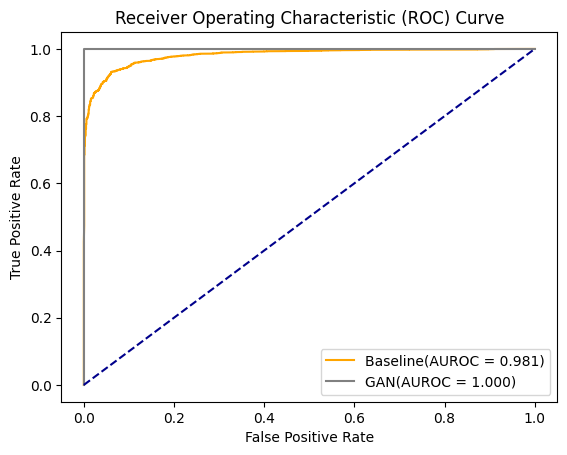

In [94]:
#ROC-AUC curve
plot_roc_cur(fpr_train, tpr_train, fpr_train_GAN, tpr_train_GAN, auc_train, auc_train_GAN, 'Baseline', 'GAN')

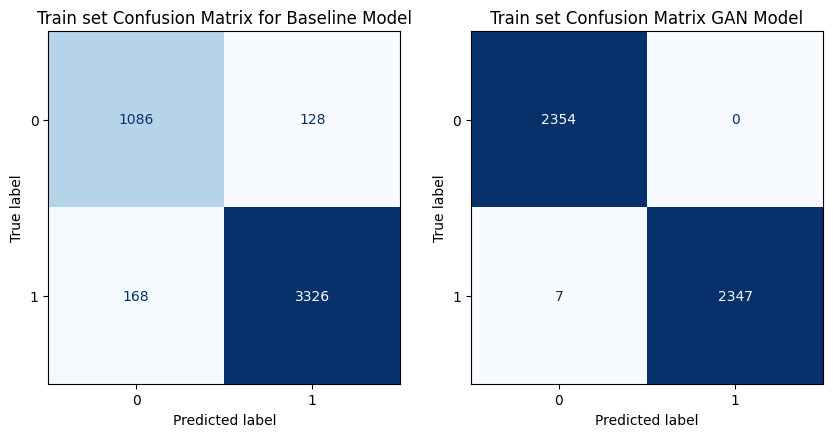

In [103]:
# confusion matrices

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first subplot on the left
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp1.plot(ax=ax[0], values_format='.0f', cmap='Blues',  colorbar=False)

# Plot the second subplot on the right
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_train_GAN)
disp2.plot(ax=ax[1], values_format='.0f', cmap='Blues', colorbar=False)

ax[0].set_title('Train set Confusion Matrix for Baseline Model')
ax[1].set_title('Train set Confusion Matrix GAN Model')

# show the plot
plt.show()

### Validation metrics

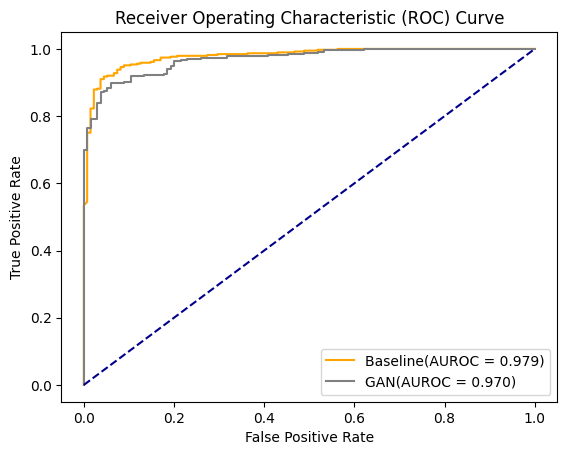

In [95]:
#ROC-AUC curve
plot_roc_cur(fpr_val, tpr_val, fpr_val_GAN, tpr_val_GAN, auc_val, auc_val_GAN, 'Baseline', 'GAN')

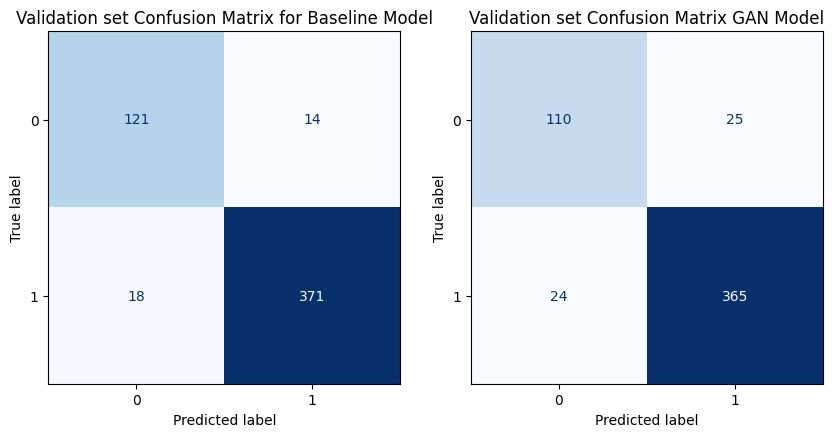

In [104]:
# confusion matrices

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first subplot on the left
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_val)
disp1.plot(ax=ax[0], values_format='.0f', cmap='Blues',  colorbar=False)

# Plot the second subplot on the right
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_val_GAN)
disp2.plot(ax=ax[1], values_format='.0f', cmap='Blues', colorbar=False)

ax[0].set_title('Validation set Confusion Matrix for Baseline Model')
ax[1].set_title('Validation set Confusion Matrix GAN Model')

# show the plot
plt.show()

### Test metrics

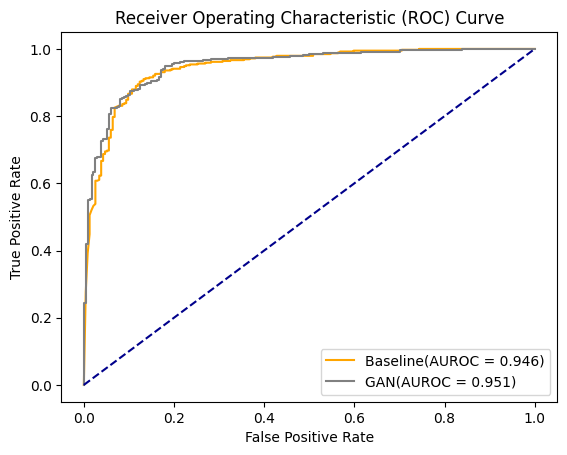

In [96]:
#ROC-AUC curve
plot_roc_cur(fpr_test, tpr_test, fpr_test_GAN, tpr_test_GAN, auc_test, auc_test_GAN, 'Baseline', 'GAN')

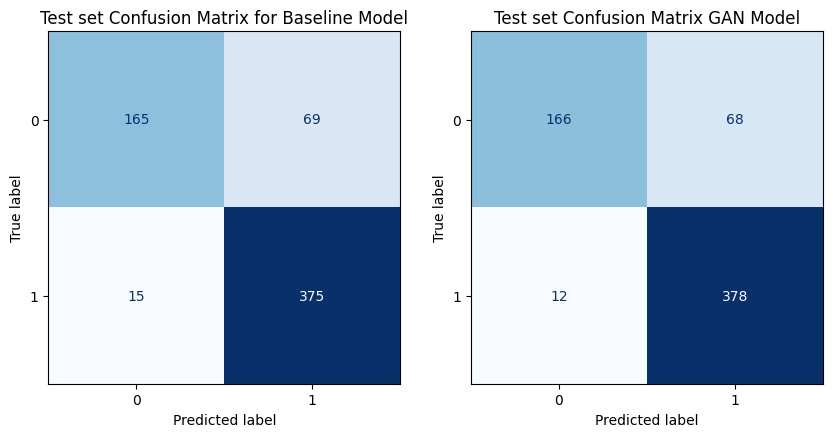

In [105]:
# confusion matrices

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first subplot on the left
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp1.plot(ax=ax[0], values_format='.0f', cmap='Blues',  colorbar=False)

# Plot the second subplot on the right
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_test_GAN)
disp2.plot(ax=ax[1], values_format='.0f', cmap='Blues', colorbar=False)

ax[0].set_title('Test set Confusion Matrix for Baseline Model')
ax[1].set_title('Test set Confusion Matrix GAN Model')

# show the plot
plt.show()

How would you interpret the results you achieved? Would you say your GAN-based privatization method is useful in practice? Do you reject or accept the hypothesis defined above?

In [ ]:
# Your answer goes here

Overall, we can see that the results are very good achieving comparable metrics between the two approaches. Looking at the ROC-AUC curves and confusion matrices for validation and test set we can see that the baseline model tends to perform a little bit better than the synthetic classifier, although this difference is minimal. Looking at AUC and ACC metrics, in many cases, the performance achieved with the synthetic dataset is comparable, if note supperior, to that obtained with the real dataset  (see the table for better comparison).

However, it's important to note the possibility of overfitting with this approach. In the training set, we observe nearly perfect accuracy, surpassing that of the baseline model. Despite this, there is more performance between the test sets of both approaches, indicating that overfitting may be a concern.

| Model    |Dataset | AUC   | Accuracy |
|----------|--------|-------|----------|
| Baseline | Train  | 0.981 | 0.937    |
|          | Val    | 0.979 | 0.939    |
|          | Test   | 0.946 | 0.865    |
| GAN      | Train  | 1.000 | 0.999    |
|          | Val    | 0.970 | 0.906    |
|          | Test   | 0.951 | 0.872    |



Regarding the hypothesis,
"*H1: Could we, instead of using real patient data, use only synthetic data to train our classifier and achieve comparable performance?*" we can conclude that it is **accepted**. Training the classifier on the synthetic dataset appears to be a favorable strategy as we achieve comparable performance. Further analysis and exeprimentation may be needed to confirm the robustness of this conclusions and to assess the potential limitations or biases introduced by using only synthetic data fro training.

# 8. Reflective Account

What could be the reasons why our study did or did not succeed? What do you think are the limitations of our study? What can we learn and takeaway from this exercise? How should it inform our future work? What would you try next?

In [ ]:
# Your answer goes here.

The study was a success as we have been able to achieve high classification accuracy training exclusively on generated synthetic chest X-rays images for diagnosis of lung pneumonia. On of the advantages this new dataset has given is that we have been able to train on a balanced dataset, which its always more effective when  training a binary classifier model. The main drawback we've seen is the possibility of overfitting, but applying mitigation techniques such as early stopping or introducing regularization techniques can address this concern. Plotting learning curves would provide further insight into the occurrence of overfitting.

This approach demonstrates roboustness and holds potential for extrapolation in diverse tasks, including to different clinical images or even completly different domains. It serves as a good strategy for scenarios where data privacy is a concern, and models require extra data for optimal performance. Nevertheless, given the synthetic nature of the data, its important to remain cautious and conduct thorough experiments to ensure the model's generalizability and resilience to out-of-distribution data.

Thank you for working on this study. We hope you enjoyed it and it was a good learning experience for you.

Please send any feedback you may have to [Richard.Osuala@ub.edu](mailto:Richard.Osuala@ub.edu).